In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model as lm
from sklearn.metrics import r2_score

In [2]:
"""
Data was sourced from the Integrated Marine Observing System (IMOS). An 
initiative of the Australian Government being conducted as part of the 
National Collaborative Research Infrastructure Strategy.
"""

path = '/Users/AvaZheng/Desktop/AUV_partial/Batemans201011/r20101117_001912_batemans_03_site1sz/'
name = 'DATA_Batemans201011_r20101117_001912_batemans_03_site1sz.csv' 
with open(path + name) as csvfile:
    reader = csv.reader(csvfile)
    data_list = []
    for row in reader:
        data_list.append(row)

In [3]:
n = len(data_list)

In [4]:
data = {}
for label in data_list[2]:
    data[label] = []
    
k = len(data_list[2])
numerical_label = ['longitude', 'latitude', 'image_width', 'depth_sensor', 'altitude_sensor', 'depth', 'sea_water_temperature', 'sea_water_salinity', 'chlorophyll_concentration_in_sea_water', 'backscattering_ratio', 'colored_dissolved_organic_matter', 'cluster_tag', 'up_left_lon', 'up_left_lat', 'up_right_lon', 'up_right_lat', 'low_right_lon', 'low_right_lat', 'low_left_lon', 'low_left_lat']
for i in range(k):
    for j in range(3, n):
        label = data_list[2][i]
        datum = data_list[j][i]
        if label in numerical_label:
            datum = float(datum)
        data[label].append(datum) 
        
        

In [5]:
data.keys()

dict_keys(['campaign_code', 'dive_code', 'image_filename', 'longitude', 'latitude', 'image_width', 'depth_sensor', 'altitude_sensor', 'depth', 'sea_water_temperature', 'sea_water_salinity', 'chlorophyll_concentration_in_sea_water', 'backscattering_ratio', 'colored_dissolved_organic_matter', 'time', 'cluster_tag', 'up_left_lon', 'up_left_lat', 'up_right_lon', 'up_right_lat', 'low_right_lon', 'low_right_lat', 'low_left_lon', 'low_left_lat'])

In [6]:
data["sea_water_temperature"][:10]

[16.602, 16.603, 16.603, 16.598, 16.622, 16.61, 16.598, 16.557, 16.557, 16.534]

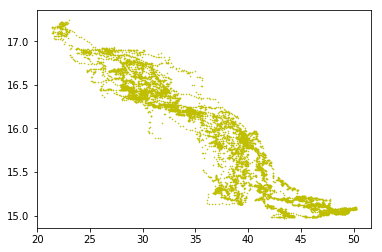

In [7]:
plt.scatter(data["depth_sensor"], data["sea_water_temperature"], c='y', s=0.3)
plt.show()

In [8]:
print(len(data["sea_water_temperature"]))
Y_temperature = np.asarray(data["sea_water_temperature"]).reshape((-1, 1))

8871


In [9]:
Y_temperature.shape

(8871, 1)

In [10]:
print(len(data["depth_sensor"]))
X_depth = np.asarray(data["depth_sensor"]).reshape((-1, 1)) 
X_depth.shape

8871


(8871, 1)

In [11]:
reg = lm.LinearRegression()

In [12]:
reg.fit(X_depth, Y_temperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
reg.score(X_depth, Y_temperature) #Linear relationship between depth and temeperature

0.8869841269812833

In [14]:
Y_pred = reg.predict(X_depth)

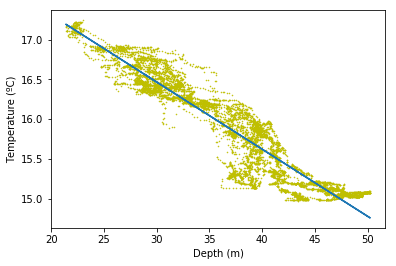

In [15]:
plt.scatter(data["depth_sensor"], data["sea_water_temperature"], c='y', s=0.3)
plt.plot(data["depth_sensor"], Y_pred)
plt.ylabel("Temperature (ºC)")
plt.xlabel("Depth (m)")
plt.show()